<div style="text-align: center;font: bold"><h3 >Data Exploration and Cleaning<h3></div>


# Load Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("sales_data.csv")

# Handle Missing Values

In [13]:
columns_with_nan = data.columns[data.isnull().any()].tolist()
print("Columns with NaN values:", columns_with_nan)

data['Units_Sold'] = data['Units_Sold'].fillna(data['Units_Sold'].mean())
data['Revenue'] = data['Revenue'].fillna(data['Revenue'].mean())
data

Columns with NaN values: ['Units_Sold', 'Revenue']


,Date,Product_Category,Units_Sold,Revenue
0,12/15/2022,Clothing,172.0,1325.06
1,10/29/2022,Clothing,126.0,686.49
2,6/16/2022,Clothing,161.0,661.48
3,10/26/2022,Clothing,128.0,4739.16
4,10/3/2022,Electronics,80.0,1194.79
...,...,...,...,...
995,4/2/2022,Clothing,32.0,1100.46
996,1/6/2022,Electronics,16.0,2752.94
997,4/14/2022,Electronics,45.0,3999.73
998,9/11/2022,Electronics,64.0,4974.49


# Generate Summary Statistics

In [14]:
numerical_cols = ['Units_Sold', 'Revenue']
summary_stats = data[numerical_cols].describe()
print("Data Summary:\n",summary_stats)

Data Summary:
         Units_Sold      Revenue
count  1000.000000  1000.000000
mean    100.335036  2777.606911
std      57.016761  1295.836040
min       0.000000   501.170000
25%      52.750000  1688.080000
50%     100.000000  2777.606911
75%     150.250000  3898.347500
max     200.000000  4994.860000


In [15]:
categorical_counts = data['Product_Category'].value_counts()
print("\nFrequency Counts for Product_Category:\n")
print(categorical_counts.to_string(index=True, header=False))



Frequency Counts for Product_Category:

Electronics    516
Clothing       484


# Data visualization

In [16]:
data['Date_Formatted'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date_Formatted')


# Time series plot of Units_Sold and Revenue over time.

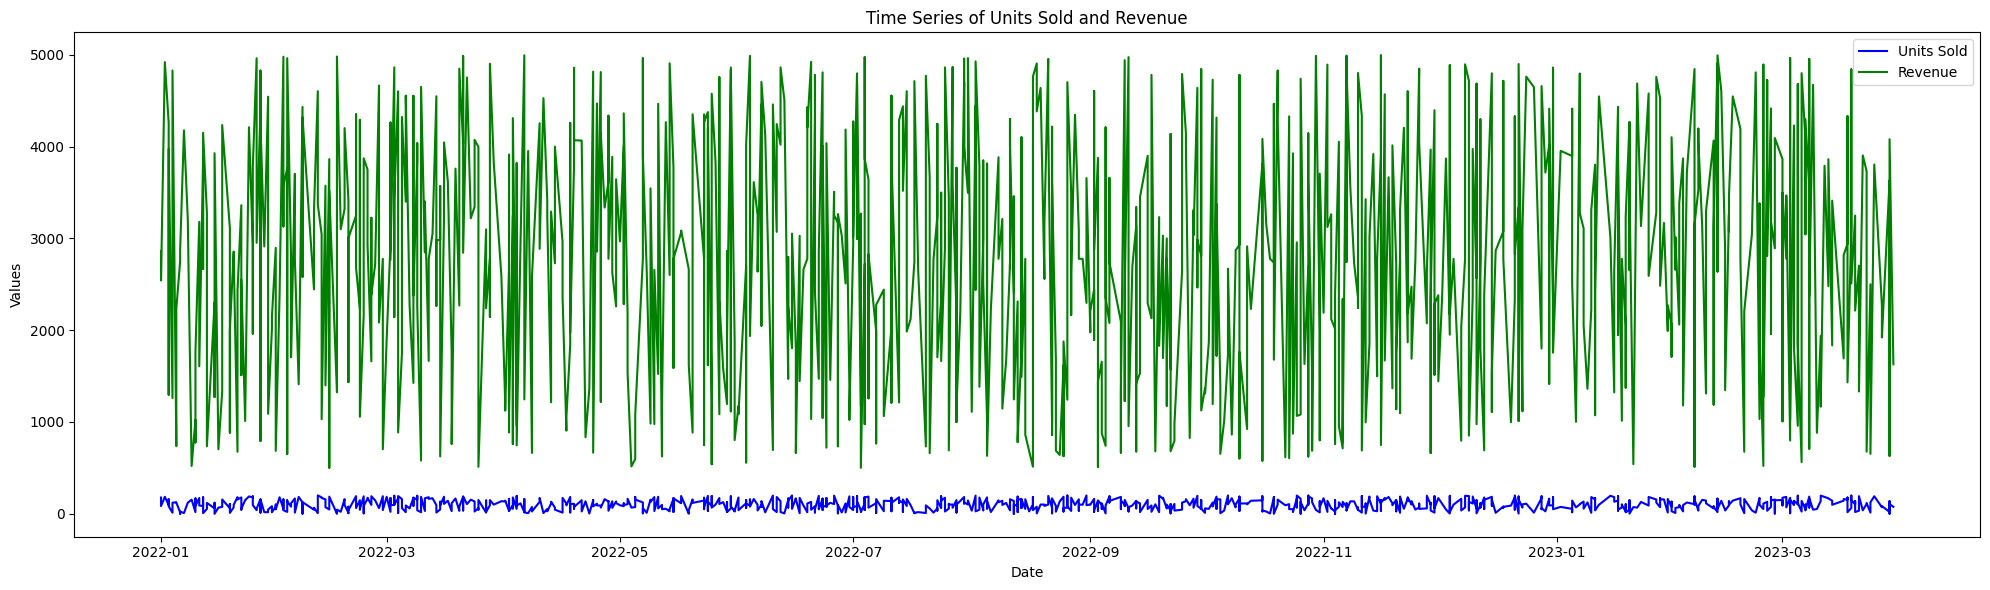

In [26]:
# data = data.head()
plt.figure(figsize=(20,6))

plt.plot(data['Date_Formatted'], data['Units_Sold'], label='Units Sold', color='blue')
plt.plot(data['Date_Formatted'], data['Revenue'], label='Revenue', color='green')

plt.title('Time Series of Units Sold and Revenue')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()

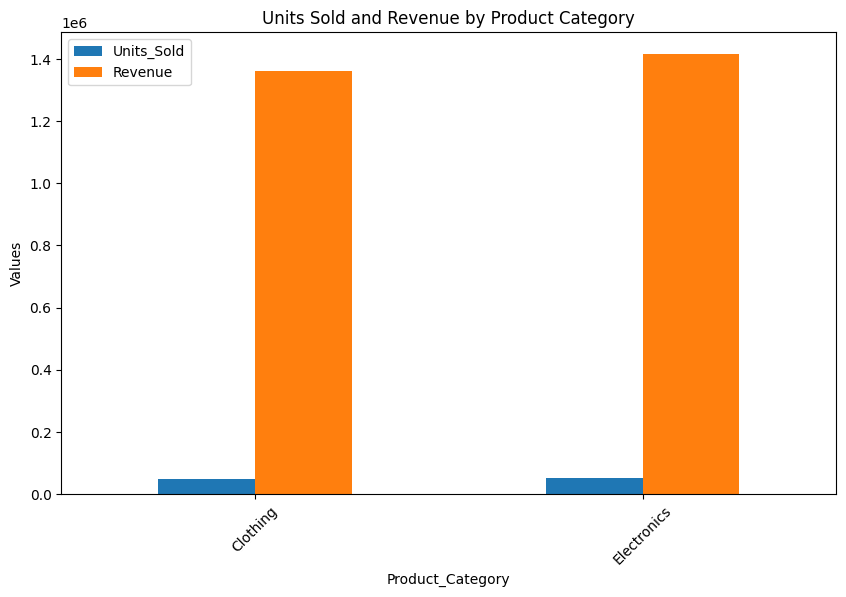

In [18]:
category_group = data.groupby('Product_Category')[['Units_Sold', 'Revenue']].sum()
category_group.plot(kind='bar', figsize=(10, 6), rot=45)
plt.title('Units Sold and Revenue by Product Category')
plt.ylabel('Values')
plt.show()

<div style="text-align: center;font: bold"><h3 >Feature Engineering<h3></div>

# Extract Date Features

In [19]:
data['Year'] = data['Date_Formatted'].dt.year
data['Month'] = data['Date_Formatted'].dt.month
data['Day'] = data['Date_Formatted'].dt.day
data['Day_of_Week'] = data['Date_Formatted'].dt.dayofweek

data.head()

,Date,Product_Category,Units_Sold,Revenue,Date_Formatted,Year,Month,Day,Day_of_Week
564,1/1/2022,Clothing,177.0,2862.96,2022-01-01,2022,1,1,5
505,1/1/2022,Clothing,84.0,2541.73,2022-01-01,2022,1,1,5
43,1/2/2022,Electronics,185.0,4920.20,2022-01-02,2022,1,2,6
721,1/3/2022,Electronics,95.0,4259.79,2022-01-03,2022,1,3,0
530,1/3/2022,Clothing,158.0,1296.68,2022-01-03,2022,1,3,0


# Save enriched dataset

In [20]:
data.to_csv('sales_data_enriched.csv', index=False)